# BoomBikes - Bike Sharing Assignment

## Problem Statement

Consider a bike rental company that has a dataset containing the daily bike demands across the American market based on some factors. It wishes to use the data to optimise the profits and to prepare themselves to cater to the people's needs once the situation gets better all around and also stand out from other service providers

## OBJECTIVE

The objective is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

__Essentially, the company wants to evaluate —__

    Which variables are significant in predicting the demand for shared bikes

    How well those variables describe the bike demands


Let us first import NumPy and Pandas and read the Bike Sharing dataset

In [396]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Reading and Understanding the Data

In [447]:
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


target is "cnt" which is a continous variable, so we can do linear reg. The other predictor variables are categorical and numeric variables.

In [448]:
data.shape #to check number of rows and columns

(730, 16)

In [449]:
data.info() #here we dont have missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [450]:
data.isnull().sum() #here we dont have missing values.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step2: Cleaning Data

__Outliers__

- Before performing statistical analyses, you should identify potential __Outliers__. That’s the subject of this post. Since the difference between mean and median is not much, we can say that therec are no outliers

In [226]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


__Dropping a few insignificant columns__

- Instant --> Dropping the Instant column as it is the index column and we will not be considering this as a predictor variable
- casual and registered --> we need total count of casual and registered users for a particular date and not based on the category. That is, cnt = target = casual + registered, hence dropping casual and registered
- atemp --> The values in this column just indicate how the actual temperature feels, so we will retain the temp column and drop this
- dteday - date column

In [227]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [451]:
#dropping the columns
data = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'cnt']]

In [229]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


So now we have 4 Numerical variables - temp, hum, windspeed and cnt

we will see  below how to deal with other columns as per the data disctionary to convert them into categorical

__Converting below Numerical variables into Categorical__ 

1. Season
2. Mnth
3. weathersit
4. weekday

In [452]:
#season
data.season = data.season.map({1: 'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [453]:
#month
data.mnth = data.mnth.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 
                           8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [454]:
#weathersit
data.weathersit = data.weathersit.map({1:'Clear & Partly', 2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain', 4:'Heavy Snow & Rain'})

In [455]:
#weekday
data.weekday = data.weekday.replace({0: 'Tue', 1: 'Wed', 2: 'Thur', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'})

In [234]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear & Partly,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear & Partly,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear & Partly,9.305237,43.6957,12.522300,1600


# Step3: Data visualisation

This will help in interpreting the data well, to get an intuitive understanding of the distributions and identifying the variables that can turn out to be useful in building the model.

## __Visualising Numeric Variables using scatter plot__

pairplot will create scatter plot among all the numeric pairs of variables

#temp and cnt - on x axis we have cnt and y axis we have temp, atemp, hum and windspeed - we see some sort of positive correlation - means some of the variance in cnt is explained by the variable temp 


conclusion - whether at all we should consider a linear model. - yes there are atleast some independent numeric variables correlated with cnt

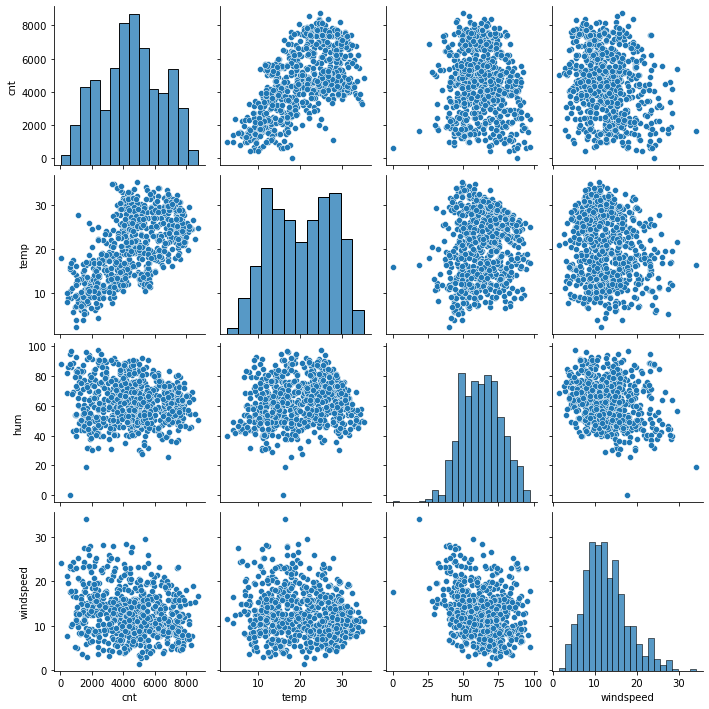

In [236]:
sns.pairplot(data=data,vars=['cnt', 'temp', 'hum','windspeed'])
plt.show()

__Visualising the dataset and understanding the relationships between target variable and each predictor numerical variables__

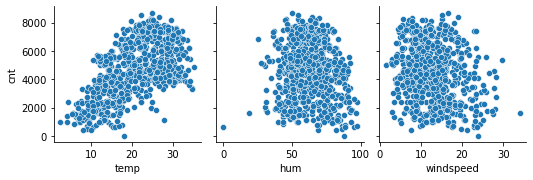

In [237]:
#see all the 3 plots beside each other
sns.pairplot(data=data, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt')

3 regression/scattered plots between the 3 predictor variables and cnt 

cnt vs temp looks like a high positive correlation, means if temp increases, count is also increasing.

cnt vs hum and windspeed has a very lesser positive correlation, datapoints are scattered and if humidity increases, count decreases

<AxesSubplot:xlabel='temp', ylabel='cnt'>

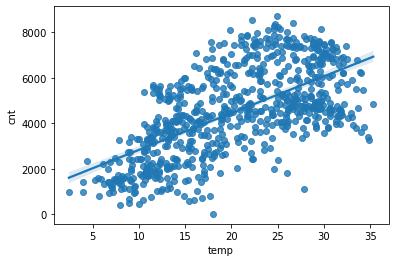

In [238]:
sns.regplot(x='temp', y='cnt', data=data)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

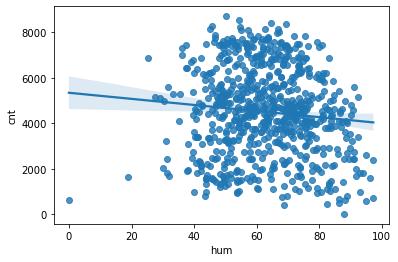

In [239]:
sns.regplot(x='hum', y='cnt', data=data)

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

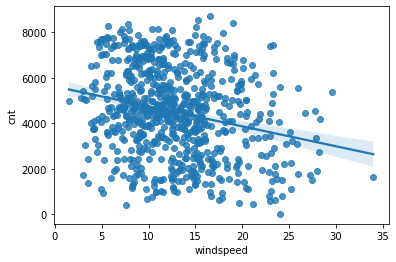

In [240]:
sns.regplot(x='windspeed', y='cnt', data=data)

## __Visualising Categorical Variables using boxplot__

the best way to visualise the relationship between a categorical eg 'season' and continous variable 'cnt' is to make a boxplot.

<AxesSubplot:xlabel='season', ylabel='cnt'>

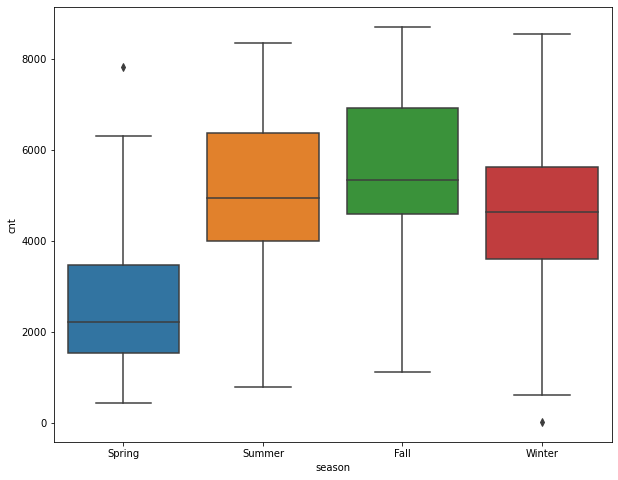

In [241]:
plt.figure(figsize=(10,8))
sns.boxplot(x='season', y='cnt', data=data)

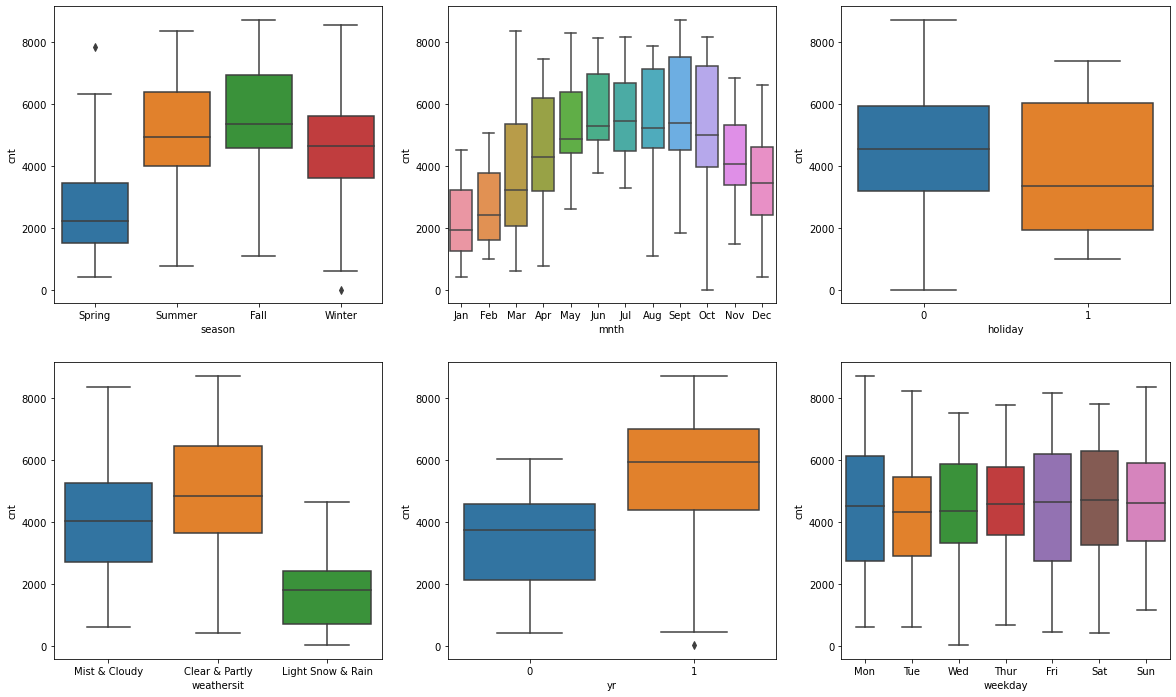

In [242]:
#subplots for all 

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.show()

__analysing the qualitative distribution of data__

- The no of users who bike shared is less for Spring
- The demand seems to be less in Jan as the users were less
- during a holiday, the no of users are less
- bad weather affects the bike shared services
- 2019 has seen an increase in the no of users

## __Checking Correlation__

In [243]:
data.corr()  # just shows the correlation between each points

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


__Correlation for continuous variables__

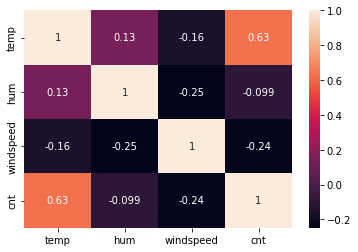

In [244]:
#plot the correlation 
sns.heatmap(data[['temp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

temp has correlation of 1 with count, means strongest positive correlation - thus linearly correlated while windspeed is negatively correlated

__Correlation for numerical variables__

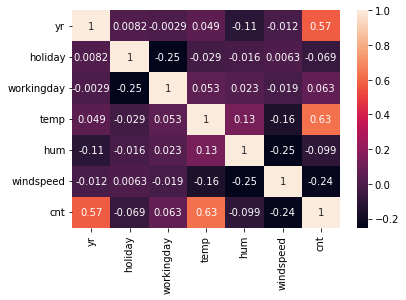

In [245]:
#plot the correlation
cor=data.corr()
sns.heatmap(cor, annot = True)
plt.show()

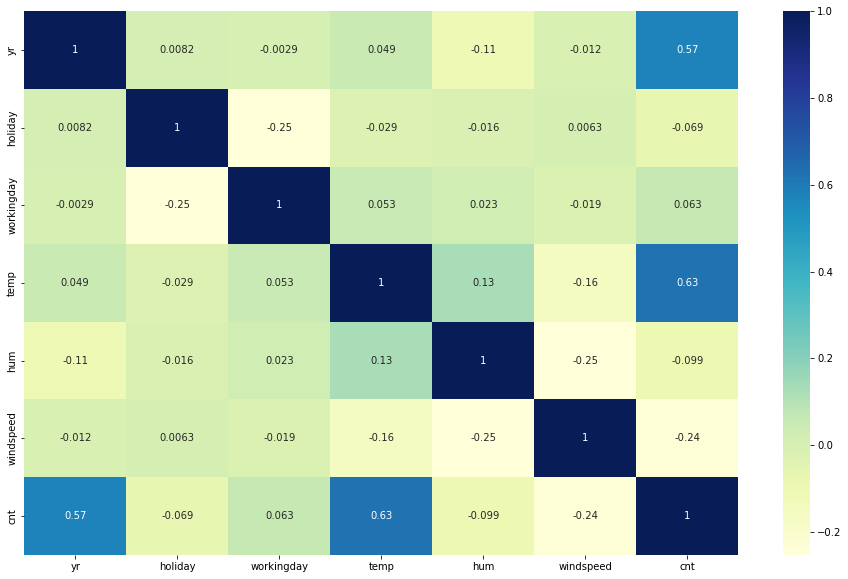

In [246]:
#heatmap
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

__this plot represets correlation of all variables with cnt__

# Step 4: Data Preparation

## Dummy Variables

corresponding to the 4 categorical variables, we will create new columns using 0 and 1 and represent the same variable

Build in method called __Get Dummies__

In [456]:
### creating dummy variables for season , mnth ,weathersit ,weekday
data_categorical = data[['season','mnth','weekday','weathersit']]

In [457]:
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [458]:
#concat the dummy df with original one
data = pd.concat([data_dummies,data],axis = 1)
data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Mon,0,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tue,0,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wed,1,Clear & Partly,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Thur,1,Clear & Partly,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Fri,1,Clear & Partly,9.305237,43.6957,12.522300,1600


In [459]:
## dropping columns for which dummy variables were created
data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

## Splitting into train and test data sets

__importing library sklearn__

so we want 70% of the data set sampled randomly and call it trained data set.

In [460]:
data_train, data_test = train_test_split(data, train_size=.7, random_state=100)
print(data_train.shape)
print(data_test.shape)

(510, 29)
(220, 29)


## Rescaling Features

Scaling is an important step because, as you may have noticed, a variable may be on a different scale with respect to all other numerical variables, which take very small values. Also, the categorical variables that you encoded earlier take either 0 or 1 as their values. Hence, it is important to have everything on the same scale for the model to be easily interpretable.

if we are interpreting coefficients in any model, it is important all variables are at a comparable scale

Using MinMax Scaling__ we will scale only the numeric variables but not the binary numeric variables of 0/1

sklearn has a module called prepocessing called minmax scaler

In [461]:
# 1 .Create or instantiate an object
scaler = MinMaxScaler()

#create a list of numeric variables
num_vars = ['cnt','hum','windspeed','temp']

# 2. Fit on data i.e. trained data
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
data_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


all binary variables are still 0 and 1, all numerical variables are mapped for a scale between 0 and 1

In [343]:
data_train.describe()  #to see min max of variables

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.150980,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.358381,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Now that you have prepared the data and are done with the test-train split, let’s prepare a heat map and take a look at the correlations between the variables.__

# Training The Model

__Once we create the training and test set, we train the model on the training set(i.e. to learn the coefficients) to get a feel for what the model looks like, we plot a heatmap of predictions of the model against the training set__

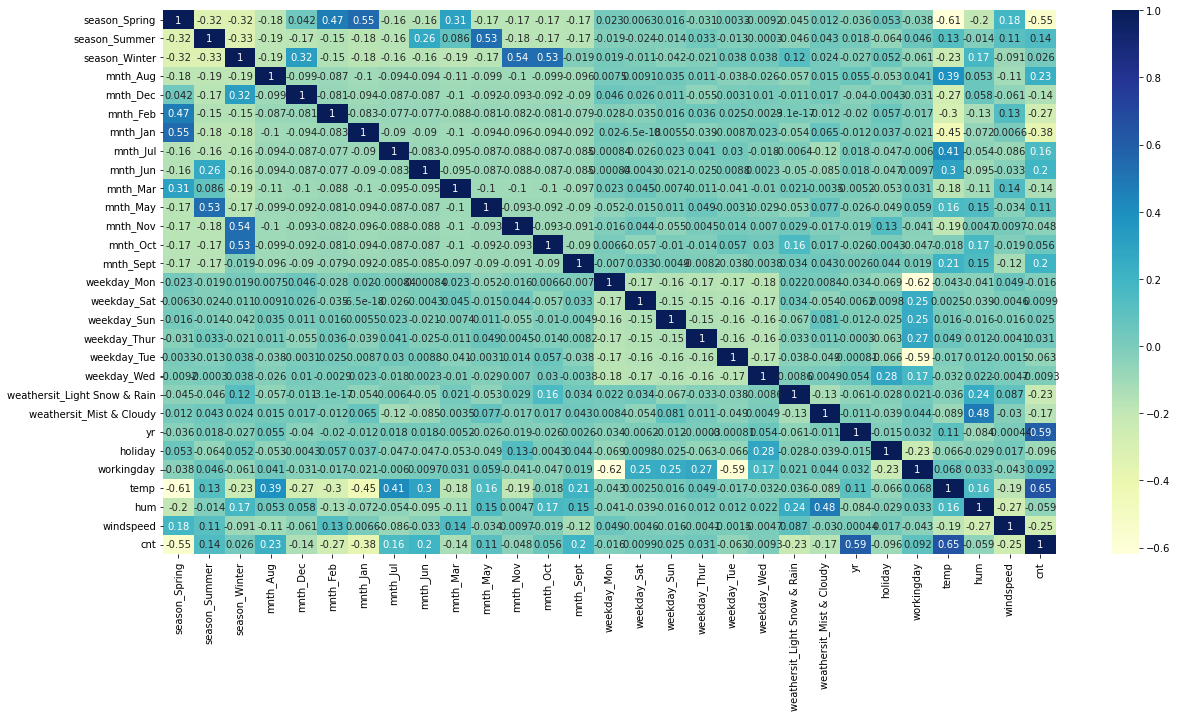

In [254]:
#heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(data_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

the first column represets correlation of all variables with price

# Step 5: Model Building

In [410]:
data_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


## X_train and y_train creation 

In [462]:
#X_train and Y_train creation 
#y train extract column cnt
#X_train is what all remains , all variables except cnt
y_train = data_train.pop('cnt')
X_train = data_train
X_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


In [257]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

__importing statsmodel library for linear regression model__

by default stats model library does not include the constant/intercept/coefficient.. So we should include manually - so this command adds a column to the data set called const and all values are 1.

## RFE - Recursive Feature Elimination

__This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)... Using RFE to eliminate some columns__

__Importing RFE and LinearRegression__

In [463]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [464]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 10),
 ('weekday_Thur', False, 9),
 ('weekday_Tue', False, 6),
 ('weekday_Wed', False, 8),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

## Building model using statsmodel, for the detailed statistics

# Model 1

In [465]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [466]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [467]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [468]:
#first step is to add constant 
X_train_rfe = sm.add_constant(X_train_rfe)

#create first model
lr = sm.OLS(y_train, X_train_rfe)

#fit the model
lr_model = lr.fit()

#params
lr_model.params

const                           0.251893
season_Spring                  -0.050897
season_Summer                   0.050762
season_Winter                   0.093301
mnth_Jan                       -0.034512
mnth_Jul                       -0.052918
mnth_Sept                       0.081395
weekday_Mon                     0.053552
weathersit_Light Snow & Rain   -0.247464
weathersit_Mist & Cloudy       -0.056318
yr                              0.230527
holiday                        -0.058173
workingday                      0.043335
temp                            0.509619
hum                            -0.156299
windspeed                      -0.186259
dtype: float64

In [469]:
#Let's see the summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.22e-191
Time:                        15:25:54   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

__mnth_Jan is insignificant in presence of other variables as it has a negative coefficient and p-value almost equal to 0.05; hence can be dropped__

## Model 2

__Rebuilding the model without mnth_Jan__

In [470]:
# dropping mnth_Jan
X_train_new = X_train_rfe.drop(["mnth_Jan"], axis = 1)

In [471]:
#first step is to add constant 
X_train_lm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train, X_train_lm)

#fit the model
lr_model = lr.fit()

#Let's see the summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.11e-191
Time:                        15:25:59   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

## VIF

__Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:__
 
 __VIF = 1 / 1 - R-square of i__
 
 the higher the relation, higher the VIF but we want a VIF of less than 5

__import statsmodel.stats - outliers_ influence__

In [472]:
#creating a datafame that will contain the name of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.35
1,season_Spring,5.02
12,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.62
13,hum,1.91
11,workingday,1.88
6,weekday_Mon,1.78
8,weathersit_Mist & Cloudy,1.57
4,mnth_Jul,1.49


In [473]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [474]:
#creating a datafame that will contain the name of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,28.46
11,temp,16.98
10,workingday,5.28
13,windspeed,4.72
0,season_Spring,4.24
2,season_Winter,3.42
1,season_Summer,2.85
7,weathersit_Mist & Cloudy,2.29
8,yr,2.08
5,weekday_Mon,1.97


## Model 3

__Rebuilding the model without hum__

In [475]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [476]:
#first step is to add constant 
X_train_lm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train, X_train_lm)

#fit the model
lr_model = lr.fit()

#Let's see the summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.28e-188
Time:                        15:26:09   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [477]:
#creating a datafame that will contain the name of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.97
10,workingday,5.20
12,windspeed,4.65
0,season_Spring,2.49
1,season_Summer,2.34
8,yr,2.07
2,season_Winter,1.98
5,weekday_Mon,1.96
3,mnth_Jul,1.58
7,weathersit_Mist & Cloudy,1.57


## Model 4

__Rebuilding the model without workingday__

In [478]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [479]:
#first step is to add constant 
X_train_lm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train, X_train_lm)

#fit the model
lr_model = lr.fit()

#Let's see the summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.68e-186
Time:                        15:26:16   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [480]:
#creating a datafame that will contain the name of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.12
11,windspeed,4.62
1,season_Summer,2.23
0,season_Spring,2.10
8,yr,2.07
2,season_Winter,1.79
3,mnth_Jul,1.58
7,weathersit_Mist & Cloudy,1.55
4,mnth_Sept,1.34
5,weekday_Mon,1.19


## Model 5

__Rebuilding the model without weekday_Mon__

In [481]:
X_train_new = X_train_new.drop(['weekday_Mon'], axis=1)

In [482]:
#first step is to add constant 
X_train_lm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train, X_train_lm)

#fit the model
lr_model = lr.fit()

#Let's see the summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.06e-187
Time:                        15:26:21   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [483]:
#creating a datafame that will contain the name of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.23
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.78
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sept,1.34
5,weathersit_Light Snow & Rain,1.08


## Model 6 - Final Model

__Rebuilding the model without season_Spring and mnth_Jul__

In [484]:
X_train_new = X_train_new.drop(['season_Spring'], axis=1)
X_train_new = X_train_new.drop(['mnth_Jul'], axis=1)

In [485]:
#first step is to add constant 
X_train_lm = sm.add_constant(X_train_new)

#create first model
lr = sm.OLS(y_train, X_train_lm)

#fit the model
lr_model = lr.fit()

#Let's see the summary of our linear model
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.83e-186
Time:                        15:26:26   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [486]:
#creating a datafame that will contain the name of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,3.68
8,windspeed,3.06
5,yr,2.00
0,season_Summer,1.57
4,weathersit_Mist & Cloudy,1.48
1,season_Winter,1.37
2,mnth_Sept,1.20
3,weathersit_Light Snow & Rain,1.08
6,holiday,1.04


## Interpretating the Results of Final Model

__Let us select Model 6 as our final as it has all important statistics as expected (R-square, Adjusted R-squared and F-statistic), and no multi collinear (high VIF) variables.  ----->  P-value for all the features is almost 0.0 and R2 is 0.830 which is significantly high and  Prob (F-statistic) is 0.00000283__


The most important metrics we will look at are coefficient(coef), signigicance/p-value of coefficients and Prob(F-Statistic).


1. __Pvalues__ are 0 at this constant which means both coefficients are significant, this also tells that since p-vales are very low, relationships betweenall variables is not obtained purely by chance, there is indeed a real statistical relationship.


2. __R-squared__ - the extent of fit, i.e. the variance explanatory power of the model - R-squared varies from 0 to 1 wherein a value of 0 implies that none of the variance in the data is explained and a value of 1 implies that all of the variance in the data is explained. Hence, a value of 0.830 is a high value of R-squared which in turn implies that the model explains much variance present in the data.


3. __Prob(f-statistic)__ - model fit is statistically significant and that the explained variance is not purely by chance . Since the 'Prob (F-statistic)' is 0.00000283 which is less than 0.05, we can conclude that the overall model fit is significant.



# Step 6: Residual Analysis of the train data

__The fundamental assumption in linear reg is that residuals should be normally distributed. This is the step where we validate the assumption.. So let us plot the histogram of the error terms and see what it looks like.__



error(residual) = f(y_train, y_train_pred) - that is the difference between the actual values and predicted



lr_model contains the model that is already trained which means it knows the constant and coefficient

__Importing the required libraries for plots.__

In [487]:
#actual y_train - predicted values of y
y_train_pred = lr_model.predict(X_train_lm)
y_train_pred

576    0.764943
426    0.483717
728    0.391485
482    0.556437
111    0.266762
         ...   
578    0.803572
53     0.219894
350    0.246747
79     0.307973
520    0.642313
Length: 510, dtype: float64

<AxesSubplot:ylabel='Density'>

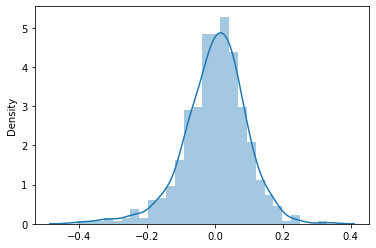

In [488]:
#compute residual and plot
res = y_train - y_train_pred
sns.distplot(res)

__dist of error terms is approximately centred around 0 and normal i.e. it is proximately centred around 0__

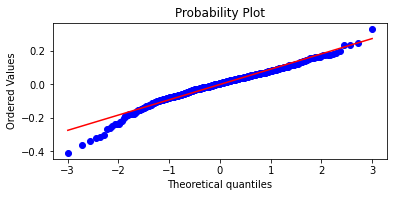

In [305]:
## QQ plot
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)

__mostly it is normally distributed, although there are sume bumps in the tail direction__

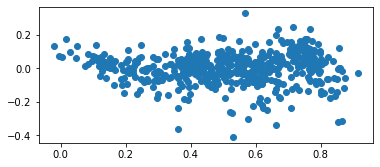

In [307]:
#homoscedascity - to plot the residuals with respect to y_pred
fig, ax = plt.subplots(figsize=(6,2.5))
_= ax.scatter(y_train_pred,res)

__there is a funnel here being created, some non-linear relationship__

__pattern means all the residuals are scattered around y = 0. but here we are confident that model is good that there is no easily idetifiable patterns__

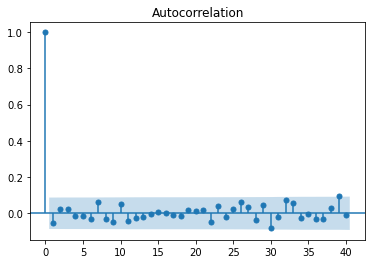

In [311]:
#auto-correlation 
acf = smt.graphics.plot_acf(res,lags=40,alpha = 0.05)
acf.show()

__the auto-correlation can be validated using ACF plot, we see there is a pattern in residuals__

# Step 7: Predictions and Evaluation on the Test Set

__Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model on the test set and evaluate the model__

__In terms of Evaluation, the way we evaluate a linear model is using Rsquared. We saw that R2 on the training set is 83% i.e. in our final model. Now we will see what is the R2 of the test set.__

In [316]:
#Lets use test set to make predictions do the evaluation

## Scaling on Test Set

__An important step to not miss is that the same pre-processing steps on the training set have to be replicated on the test set.__

In [489]:
num_vars = ['cnt','hum','windspeed','temp']


data_test[num_vars] = scaler.transform(data_test[num_vars])

In [490]:
data_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.127273,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.334038,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


## Divide into X_test and y_test

In [491]:
y_test = data_test.pop('cnt')
X_test = data_test

In [492]:
#add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Tue,weekday_Wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
184,1.0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0.831783,0.657364,0.084219
535,1.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0.901354,0.610133,0.153728
299,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.511964,0.837699,0.334206
221,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0.881625,0.437098,0.339570
152,1.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0.817246,0.314298,0.537414


In [493]:
X_test_sm.columns

Index(['const', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thur', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [497]:
X_test_sm = X_test_sm.drop(['season_Spring', 'mnth_Aug', 'mnth_Dec', 
                            'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 
                            'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 
                            'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 
                            'weekday_Thur', 'weekday_Tue', 'weekday_Wed', 
                            'workingday', 'hum'], axis=1)

In [498]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

In [499]:
#evaluate the model - compute Rsquared
r2_score(y_true=y_test , y_pred=y_test_pred)

0.7941977535477242

__R2 on test set is 79% which is pretty close to training set R2. it indicates stability - what model has learnt on training set, it can generalise well on test set__

In [500]:
#we can also compute other metric - mean squared error
mse = mean_squared_error(y_test, y_test_pred)
mse

0.009840286135133236

## Model Evaluation

__Evaluate the model (training set, test set) i.e. should fit well on training set and also fit well on test set__

Text(0, 0.5, 'y_test_pred')

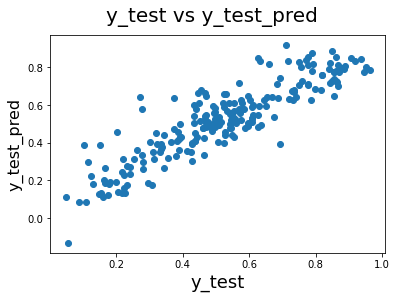

In [505]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

## To wrap this up

__we can see that the equation of our best fitted line is__ 


count(cnt) = 0.1259 + 0.5480 X temp + 0.2329 X yr + 0.1293 X season_Winter + 0.0881 X season_Summer + 0.1012 X mnth_Sep - 0.2829 X weathersit_Light Snow & Rain - 0.0784 X weathersit_Mist & Cloudy - 0.0987 X holiday - 0.1532 X windspeed

__Based on the above equation of the model, we see the below observations__



1. The highest absolute value of coefficient is corresponding to the variable 'temp'. If count increases by 1 unit, temp increases by .5480 units. 


2. We have 5 variables which have a positive coefficient which means that with an increase in these values, count will also increase.


3. We have 4 variables with a negative coefficient which means that if the count increases, the values of these variables decrease.

# Result

In [507]:
#evaluate the model - look at r2 and compare 
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8303450237489229
0.7941977535477242


__Comparing__
- R2 of train set is .830
- R2 of test set is .794

__Overall we have a decent model, R2 on test set is 79% which is pretty close to training set R2. it indicates stability- What model has learnt on training set, it can generalise well on test set__

__We should know what else is possible to make this model better. We have a couple of options:__
1. Creating derived metrics
2. Build a non-linear model

## Conclusion

__Analysing the model we can conclude that the top predictor variables affecting the bike rentals are by temperature,season and month. The September month has proven to be profitable along with Spring and Summer seasons when bike rentals are at the highest. The weather conditions and windspeed affect the bike rentals as seen above.. Lastly, 2019 saw a significant increase in the bike rentals__

In [506]:
# 4. evaluate the model - look at r2 and compare 
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8303450237489229
0.7941977535477242
